Các bước Phân tích nhân tố:
1. Làm sạch dữ liệu, biến các cột định tính thành định lượng, chuẩn hoá dữ liệu z-score
2. Kiểm định dữ liệu có phù hợp với FA (KMO test, Barlett test)
3. Tính giá trị riêng, vector riêng, phương sai giải thích (sắp xếp lớn -> bé) và phương sai tích luỹ
4. Chọn số nhân tố
5. Tính ma trận hệ số tải
6. Xoay nhân tố để đưa ma trận hệ số tải về dạng dễ đọc (dễ nhìn ra nhóm)
7. Đặt tên nhân tố
8. Điểm nhân tố

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [27]:
df = pd.concat([pd.read_csv('data/train.csv'), pd.read_csv('data/test.csv')], sort = False)
df = df.dropna()
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [28]:
# Hiển thị các cột và kiểu dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129487 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129487 non-null  int64  
 1   id                                 129487 non-null  int64  
 2   Gender                             129487 non-null  object 
 3   Customer Type                      129487 non-null  object 
 4   Age                                129487 non-null  int64  
 5   Type of Travel                     129487 non-null  object 
 6   Class                              129487 non-null  object 
 7   Flight Distance                    129487 non-null  int64  
 8   Inflight wifi service              129487 non-null  int64  
 9   Departure/Arrival time convenient  129487 non-null  int64  
 10  Ease of Online booking             129487 non-null  int64  
 11  Gate location                      129487 non

In [29]:
# Xoá cột không cần thiết
df = df.drop(columns=['Unnamed: 0', 'id'])
# Đưa ra các cột định tính và tập giá trị của chúng
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_values = {col: df[col].unique() for col in categorical_columns}
# In ra các cột định tính và tập giá trị của chúng
for col, values in categorical_values.items():
    print(f"{col}: {values}")

Gender: ['Male' 'Female']
Customer Type: ['Loyal Customer' 'disloyal Customer']
Type of Travel: ['Personal Travel' 'Business travel']
Class: ['Eco Plus' 'Business' 'Eco']
satisfaction: ['neutral or dissatisfied' 'satisfied']


In [30]:
# Chuyển giá trị định tính sang định lượng
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer': 1, 'disloyal Customer': 0})
df['Type of Travel'] = df['Type of Travel'].map({'Personal Travel': 0, 'Business travel': 1})
df['Class'] = df['Class'].map({'Eco': 0, 'Eco Plus': 1, 'Business': 2})
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129487 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129487 non-null  int64  
 1   Customer Type                      129487 non-null  int64  
 2   Age                                129487 non-null  int64  
 3   Type of Travel                     129487 non-null  int64  
 4   Class                              129487 non-null  int64  
 5   Flight Distance                    129487 non-null  int64  
 6   Inflight wifi service              129487 non-null  int64  
 7   Departure/Arrival time convenient  129487 non-null  int64  
 8   Ease of Online booking             129487 non-null  int64  
 9   Gate location                      129487 non-null  int64  
 10  Food and drink                     129487 non-null  int64  
 11  Online boarding                    129487 non

In [31]:
# Kiểm tra thống kê mô tả
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,129487.0,0.507410,0.499947,0.0,0.0,1.0,1.0,1.0
Customer Type,129487.0,0.816862,0.386781,0.0,1.0,1.0,1.0,1.0
Age,129487.0,39.428761,15.117597,7.0,27.0,40.0,51.0,85.0
Type of Travel,129487.0,0.690764,0.462180,0.0,0.0,1.0,1.0,1.0
Class,129487.0,1.029910,0.962638,0.0,0.0,1.0,2.0,2.0
Flight Distance,129487.0,1190.210662,997.560954,31.0,414.0,844.0,1744.0,4983.0
Inflight wifi service,129487.0,2.728544,1.329235,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129487.0,3.057349,1.526787,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,129487.0,2.756786,1.401662,0.0,2.0,3.0,4.0,5.0
Gate location,129487.0,2.976909,1.278506,0.0,2.0,3.0,4.0,5.0


In [32]:
# Chuẩn hoá (Z-score) các cột dữ liệu không là Binary hoặc Ordinal
from utils import standardize_data
columns_to_standardize = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
                          'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
                          'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
                          'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling',
                          'Checkin service', 'Inflight service', 'Cleanliness']
df[columns_to_standardize] = standardize_data(df[columns_to_standardize])
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,-1.748212,0,1,-0.731996,0.204220,0.617408,0.173518,-1.546265,...,1.230697,0.479239,-0.266750,0.311939,0.547931,1.153842,1.304619,0.273025,0.075623,0
1,0,0,-0.954435,1,2,-0.957546,0.204220,-0.692532,0.173518,0.018061,...,-1.767468,-1.851705,1.252855,-0.535459,-1.821464,0.303946,-1.740393,-0.359672,-0.236344,0
2,1,1,-0.888287,1,2,-0.048329,-0.548093,-0.692532,-0.539921,-0.764102,...,1.230697,0.479239,-0.266750,0.311939,0.547931,0.303946,1.304619,-0.386034,-0.392327,1
3,1,1,-0.954435,1,2,-0.629747,-0.548093,1.272378,1.600396,1.582387,...,-1.017927,-1.074724,1.252855,-0.535459,-1.821464,0.303946,-0.979140,-0.096048,-0.158352,0
4,0,1,1.426896,1,2,-0.978598,0.204220,-0.037562,0.173518,0.018061,...,-0.268386,-0.297743,0.493053,0.311939,-0.241867,-0.545951,-0.217887,-0.386034,-0.392327,1


In [33]:
# Kiểm tra thống kê mô tả (Làm tròn 2 chữ số thập phân)
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Gender,129487.0,0.51,0.50,0.00,0.00,1.00,1.00,1.00
Customer Type,129487.0,0.82,0.39,0.00,1.00,1.00,1.00,1.00
Age,129487.0,-0.00,1.00,-2.15,-0.82,0.04,0.77,3.01
Type of Travel,129487.0,0.69,0.46,0.00,0.00,1.00,1.00,1.00
Class,129487.0,1.03,0.96,0.00,0.00,1.00,2.00,2.00
Flight Distance,129487.0,-0.00,1.00,-1.16,-0.78,-0.35,0.56,3.80
Inflight wifi service,129487.0,0.00,1.00,-2.05,-0.55,0.20,0.96,1.71
Departure/Arrival time convenient,129487.0,0.00,1.00,-2.00,-0.69,-0.04,0.62,1.27
Ease of Online booking,129487.0,-0.00,1.00,-1.97,-0.54,0.17,0.89,1.60
Gate location,129487.0,-0.00,1.00,-2.33,-0.76,0.02,0.80,1.58


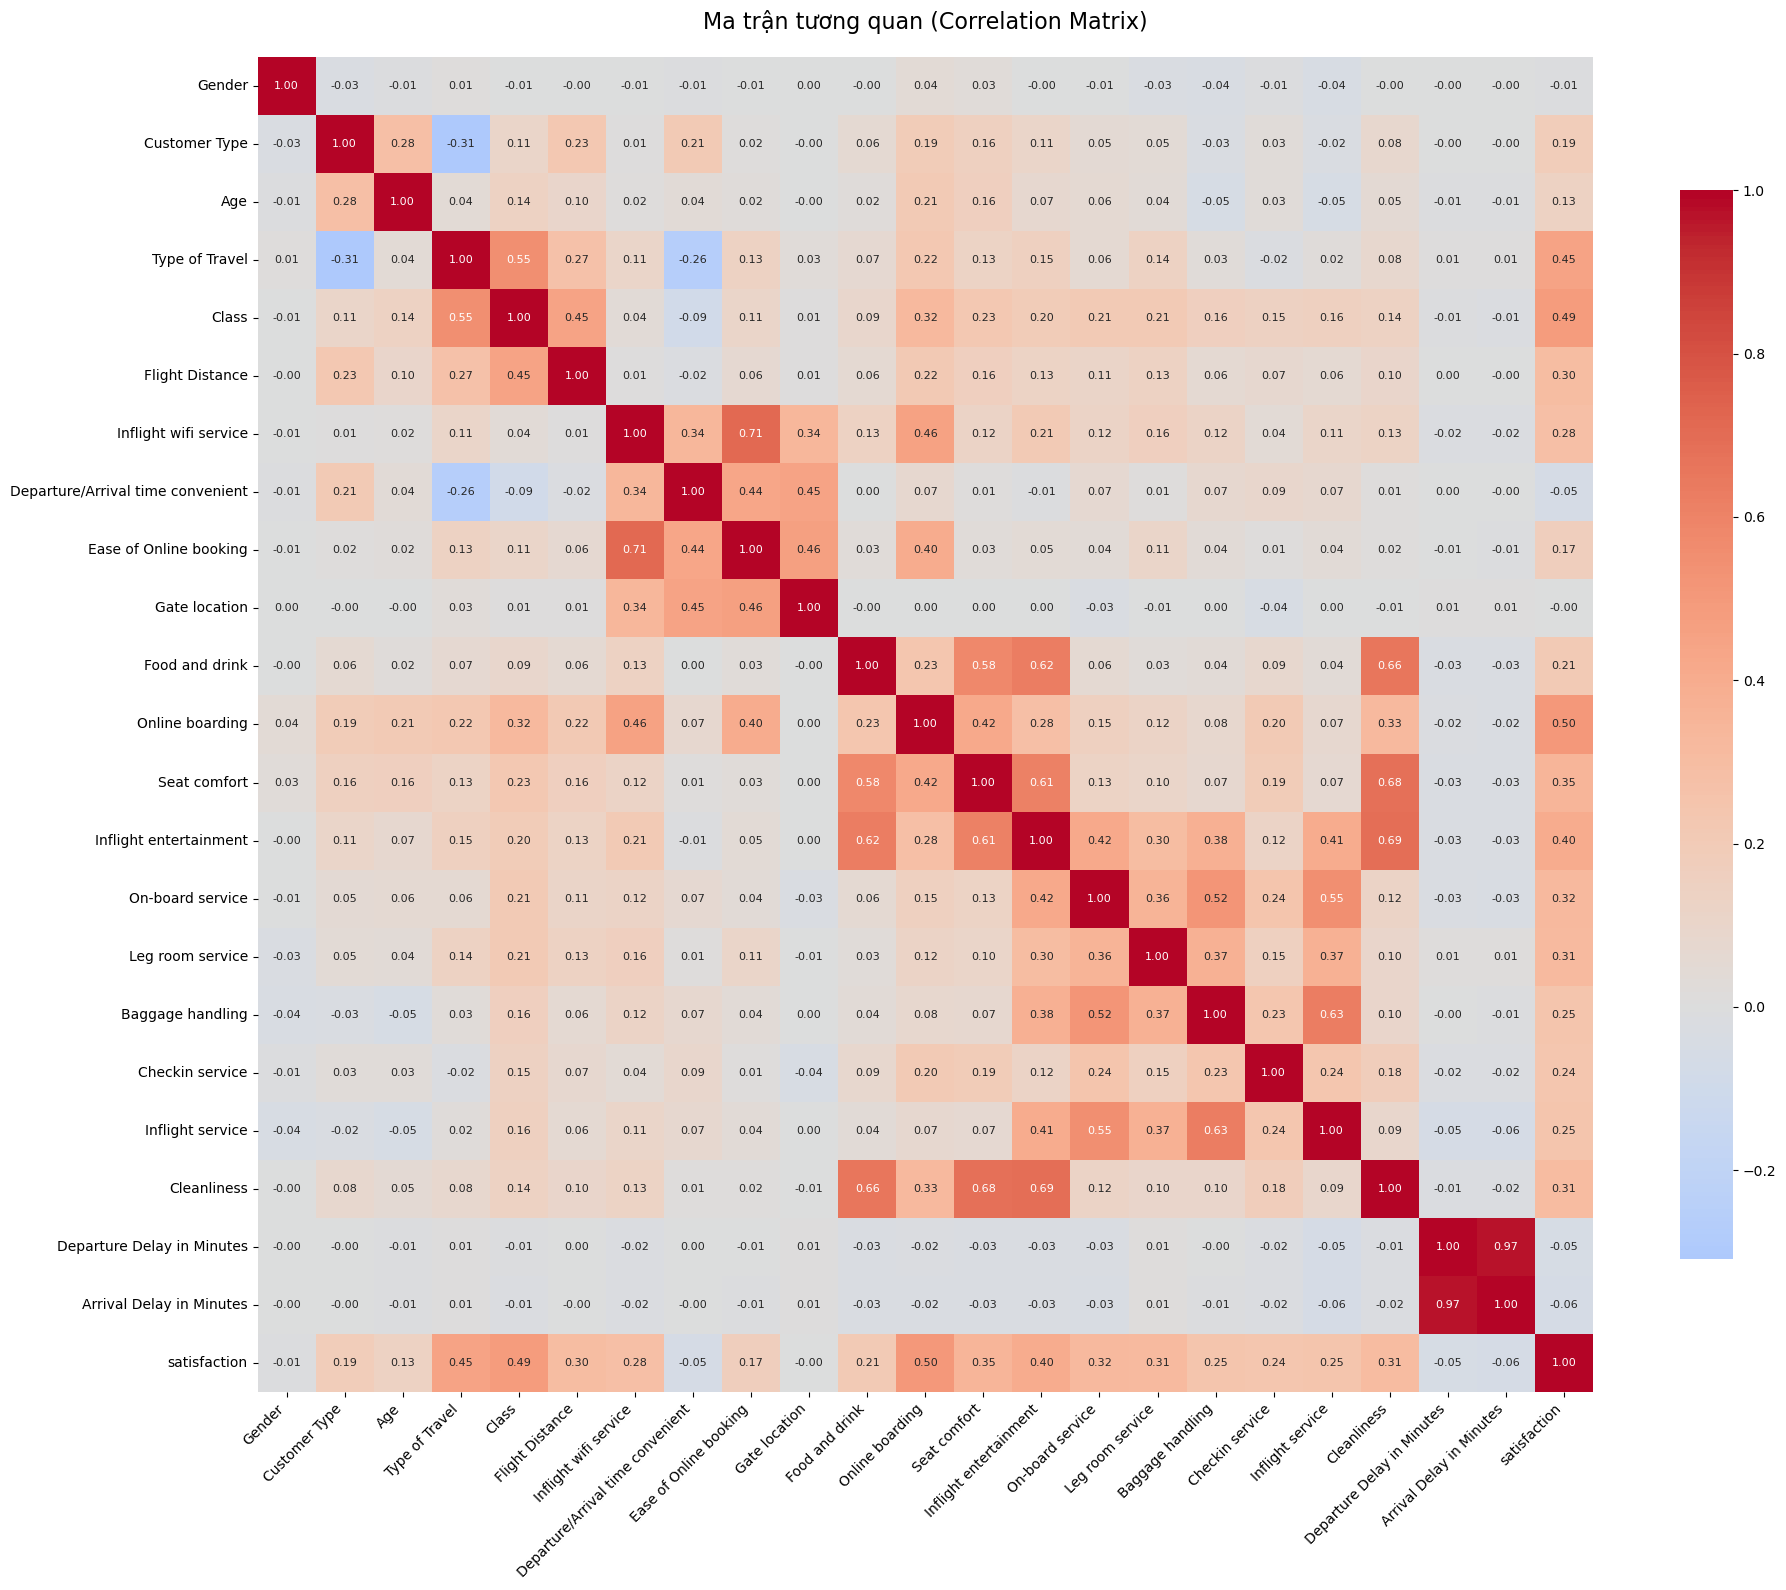

In [34]:
# Ma trận tương quan 

plt.figure(figsize=(20, 16))
correlation_matrix = df.corr()

# Sử dụng seaborn heatmap để hiển thị đẹp hơn
sns.heatmap(correlation_matrix, 
            annot=True,          # Hiển thị số
            cmap='coolwarm',     # Bảng màu đẹp
            center=0,            # Căn giữa tại 0
            square=True,         # Ô vuông
            fmt='.2f',           # Định dạng số (2 chữ số thập phân)
            annot_kws={'size': 8}, # Kích thước chữ
            cbar_kws={'shrink': 0.8})

plt.title('Ma trận tương quan (Correlation Matrix)', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [35]:
# Kiểm định dữ liệu có phù phân tích nhân tố không?
# Thực hiện kiểm định KMO và Bartlett
from utils import kmo_test, bartlett_test
kmo_value = kmo_test(df)
bartlett_results = bartlett_test(df)
print(f'KMO Test Value: {kmo_value:.4f}')
print(f'Bartlett Test Chi-Square Value: {bartlett_results[0]:.4f}')
print(f'Bartlett Test Degrees of Freedom: {bartlett_results[1]:.4f}')
print(f'Bartlett Test p-Value: {bartlett_results[2]:.4f}')

KMO Test Value: 0.7398
Bartlett Test Chi-Square Value: 1403504.6809
Bartlett Test Degrees of Freedom: 253.0000
Bartlett Test p-Value: 0.0000


In [36]:
# Tính giá trị riêng và phương sai tích lũy
from utils import calculate_eigenvalues_and_variance
eigenvalues, variance_explained, cumulative_variance = calculate_eigenvalues_and_variance(df)
print("Eigenvalues:", eigenvalues)
print("Variance Explained (%):", variance_explained)
print("Cumulative Variance (%):", cumulative_variance)

Eigenvalues: [4.53043607 2.38305841 2.20558043 1.98028896 1.92430887 1.50338781
 1.02356418 0.97532738 0.93262515 0.82113436 0.69034815 0.57797439
 0.48100593 0.46885173 0.43024599 0.39994581 0.36594245 0.31548379
 0.29159279 0.26184675 0.22833887 0.1740604  0.03465134]
Variance Explained (%): [19.69754811 10.36112352  9.58948012  8.60995198  8.36656029  6.53646874
  4.45027903  4.24055385  4.05489194  3.57014938  3.0015137   2.51293215
  2.09133012  2.03848579  1.87063475  1.73889483  1.59105414  1.37166867
  1.26779476  1.13846413  0.99277768  0.75678434  0.15065801]
Cumulative Variance (%): [ 19.69754811  30.05867163  39.64815174  48.25810373  56.62466402
  63.16113276  67.61141179  71.85196563  75.90685757  79.47700695
  82.47852064  84.99145279  87.08278291  89.1212687   90.99190345
  92.73079828  94.32185241  95.69352108  96.96131584  98.09977997
  99.09255765  99.84934199 100.        ]


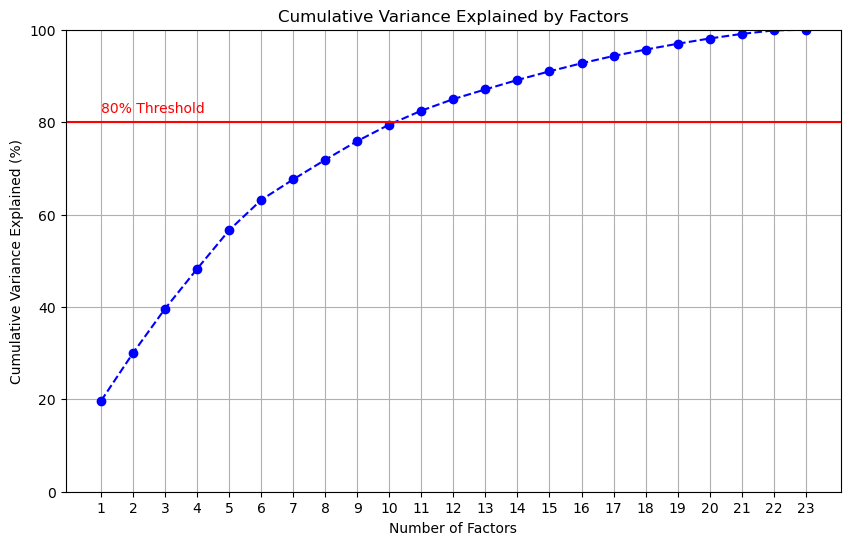

In [37]:
# Vẽ biểu đồ phương sai tích lũy
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Variance Explained by Factors')
plt.xlabel('Number of Factors')
plt.ylabel('Cumulative Variance Explained (%)')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.ylim(0, 100)
plt.grid()
plt.axhline(y=80, color='r', linestyle='-')
plt.text(1, 82, '80% Threshold', color='r', fontsize=10)
plt.show()

In [38]:
# Chọn số lượng nhân tố dựa trên giá trị riêng > 1
num_factors_case_1 = np.sum(eigenvalues > 1)
print(f'Số lượng nhân tố chọn dựa trên giá trị riêng > 1: {num_factors_case_1}')
# Chọn số lượng nhân tố sao cho phương sai tích lũy đạt ít nhất 80%
num_factors_case_2 = np.argmax(cumulative_variance >= 80) + 1
print(f'Số lượng nhân tố dựa trên phương sai tích lũy: {num_factors_case_2}')

Số lượng nhân tố chọn dựa trên giá trị riêng > 1: 7
Số lượng nhân tố dựa trên phương sai tích lũy: 11


In [39]:
# Tính ma trận hệ số tải cho case 1
from utils import factor_loadings
loadings_case_1 = factor_loadings(df, num_factors_case_1)
print(f'Factor Loadings (Case 1 - {num_factors_case_1} factors):\n', loadings_case_1)

Factor Loadings (Case 1 - 7 factors):
                                    Factor 1  Factor 2  Factor 3  Factor 4  \
Gender                            -0.009759  0.001198 -0.069213  0.005414   
Customer Type                      0.187433 -0.089770 -0.170728 -0.043745   
Age                                0.181588 -0.026049 -0.183083  0.075202   
Type of Travel                     0.355691  0.100895 -0.019342  0.395694   
Class                              0.519440  0.110448  0.049533  0.353496   
Flight Distance                    0.355619  0.061575 -0.030080  0.278376   
Inflight wifi service              0.421714 -0.702970 -0.026201 -0.023175   
Departure/Arrival time convenient  0.104940 -0.685916  0.044806 -0.179883   
Ease of Online booking             0.306858 -0.821172 -0.025354  0.042815   
Gate location                      0.088362 -0.669415 -0.019401 -0.040769   
Food and drink                     0.525099  0.186664 -0.503781 -0.193938   
Online boarding                    0.

In [40]:
# Xoay nhân tố (varimax) cho case 1
from utils import rotate_factors
rotated_loadings_case_1 = rotate_factors(loadings_case_1, method='varimax')
print(f'Rotated Factor Loadings (Case 1 - {num_factors_case_1} factors):\n', rotated_loadings_case_1)

Rotated Factor Loadings (Case 1 - 7 factors):
                                    Factor 1  Factor 2  Factor 3  Factor 4  \
Gender                            -0.029943  0.001635 -0.059536  0.004476   
Customer Type                      0.089389 -0.024240  0.000961 -0.001334   
Age                                0.046238  0.005594 -0.079678 -0.010370   
Type of Travel                     0.063748 -0.045694 -0.032956  0.009902   
Class                              0.078310 -0.006892  0.148379 -0.004842   
Flight Distance                    0.034981  0.016664  0.044235  0.009545   
Inflight wifi service              0.145386 -0.814882  0.098530 -0.013173   
Departure/Arrival time convenient -0.027318 -0.656066  0.101540  0.003976   
Ease of Online booking            -0.011595 -0.883918 -0.002651 -0.002868   
Gate location                     -0.026453 -0.684216 -0.044414  0.008537   
Food and drink                     0.856189 -0.026762 -0.047362 -0.021322   
Online boarding              

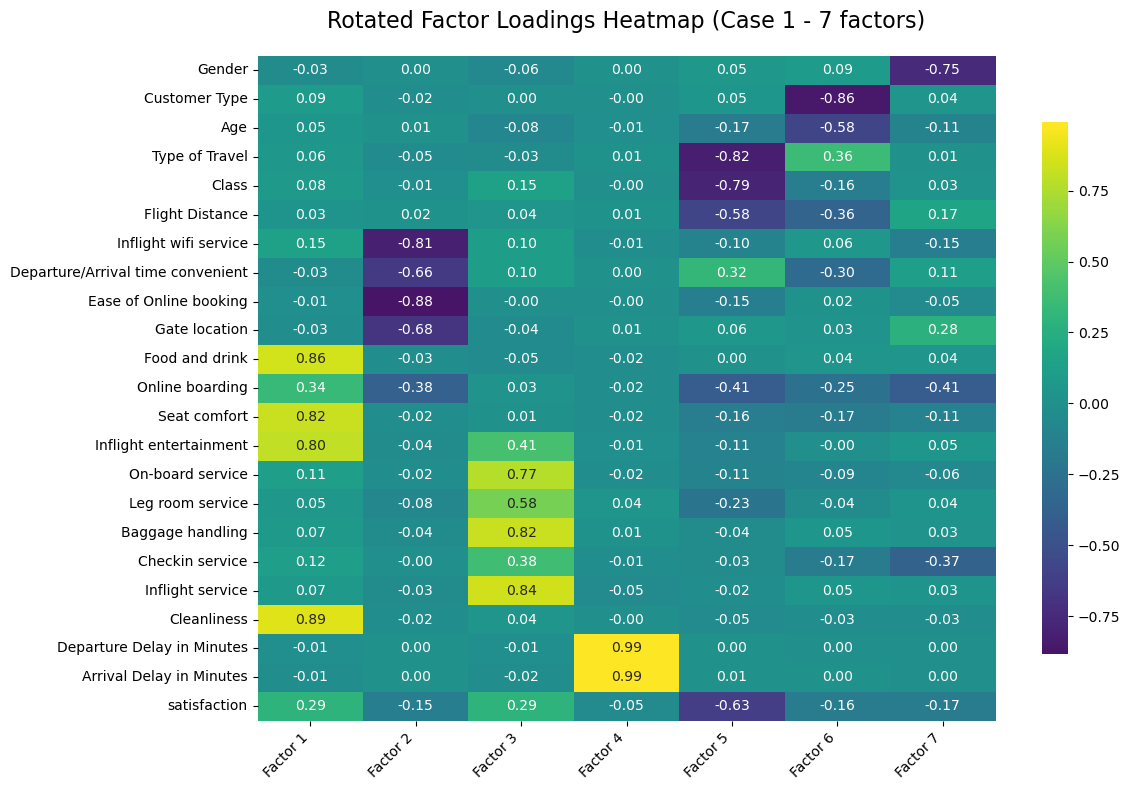

In [41]:
# Vẽ ma trận hệ số tải đã xoay
plt.figure(figsize=(12, 8))
sns.heatmap(rotated_loadings_case_1, annot=True, cmap='viridis', center=0, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title(f'Rotated Factor Loadings Heatmap (Case 1 - {num_factors_case_1} factors)', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [42]:
# Đưa ra các biến có hệ số tải > 0.5 cho từng nhân tố
for i in range(num_factors_case_1):
    factor_name = f'Factor {i+1}'
    significant_variables = rotated_loadings_case_1.index[rotated_loadings_case_1[factor_name].abs() > 0.5].tolist()
    print(f'{factor_name} significant variables (|loading| > 0.5): {significant_variables}')

Factor 1 significant variables (|loading| > 0.5): ['Food and drink', 'Seat comfort', 'Inflight entertainment', 'Cleanliness']
Factor 2 significant variables (|loading| > 0.5): ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location']
Factor 3 significant variables (|loading| > 0.5): ['On-board service', 'Leg room service', 'Baggage handling', 'Inflight service']
Factor 4 significant variables (|loading| > 0.5): ['Departure Delay in Minutes', 'Arrival Delay in Minutes']
Factor 5 significant variables (|loading| > 0.5): ['Type of Travel', 'Class', 'Flight Distance', 'satisfaction']
Factor 6 significant variables (|loading| > 0.5): ['Customer Type', 'Age']
Factor 7 significant variables (|loading| > 0.5): ['Gender']


In [43]:
# Đặt tên cho từng nhân tố dựa trên các biến có hệ số tải cao
factor_names_case_1 = {
    'Factor 1': 'In-flight Experience',
    'Factor 2': 'Convenience',
    'Factor 3': 'Service Quality',
    'Factor 4': 'Punctuality',
    'Factor 5': 'Flight Profile',
    'Factor 6': 'Demographics',
    'Factor 7': 'Gender'
}

In [44]:
# Điểm nhân tố cho từng quan sát
from utils import factor_scores
factor_scores_case_1 = factor_scores(df, rotated_loadings_case_1)
# Đổi tên cột dựa trên tên đã đặt
factor_scores_case_1 = factor_scores_case_1.rename(columns=factor_names_case_1)
print(f'Factor Scores (Case 1: {num_factors_case_1} factors):\n', factor_scores_case_1)

Factor Scores (Case 1: 7 factors):
        In-flight Experience  Convenience  Service Quality  Punctuality  \
0                  4.066711     0.394162         2.242521     0.221786   
1                 -6.631754     0.455508        -2.374266    -0.364315   
2                  5.254443     1.035348         1.855239    -0.940909   
3                 -4.306256    -2.418151        -1.548259    -0.033333   
4                  2.057686    -1.090122         0.051360    -0.847848   
...                     ...          ...              ...          ...   
25971              1.491142     0.942059         0.824249    -0.867192   
25972              2.923965    -3.209600         4.433632    -0.895839   
25973             -4.317462     0.547396         0.463104    -0.669360   
25974              2.548968    -0.801121         2.188430    -0.945440   
25975             -5.043119    -0.072780        -7.722168    -0.551671   

       Flight Profile  Demographics    Gender  
0            2.215724      

In [45]:
# Thông kê mô tả điểm nhân tố
factor_scores_case_1.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
In-flight Experience,129487.0,0.0,3.34,-8.63,-2.36,0.54,2.71,6.04
Convenience,129487.0,0.0,2.60,-5.80,-1.76,0.13,1.89,6.92
Service Quality,129487.0,0.0,2.93,-8.75,-2.11,0.26,2.14,5.63
Punctuality,129487.0,-0.0,1.98,-1.14,-0.80,-0.64,-0.13,81.73
Flight Profile,129487.0,-0.0,2.72,-5.86,-2.55,0.10,2.36,6.17
Demographics,129487.0,-0.0,1.71,-3.86,-1.26,-0.38,0.75,5.61
Gender,129487.0,0.0,1.14,-3.25,-0.86,-0.01,0.81,3.75


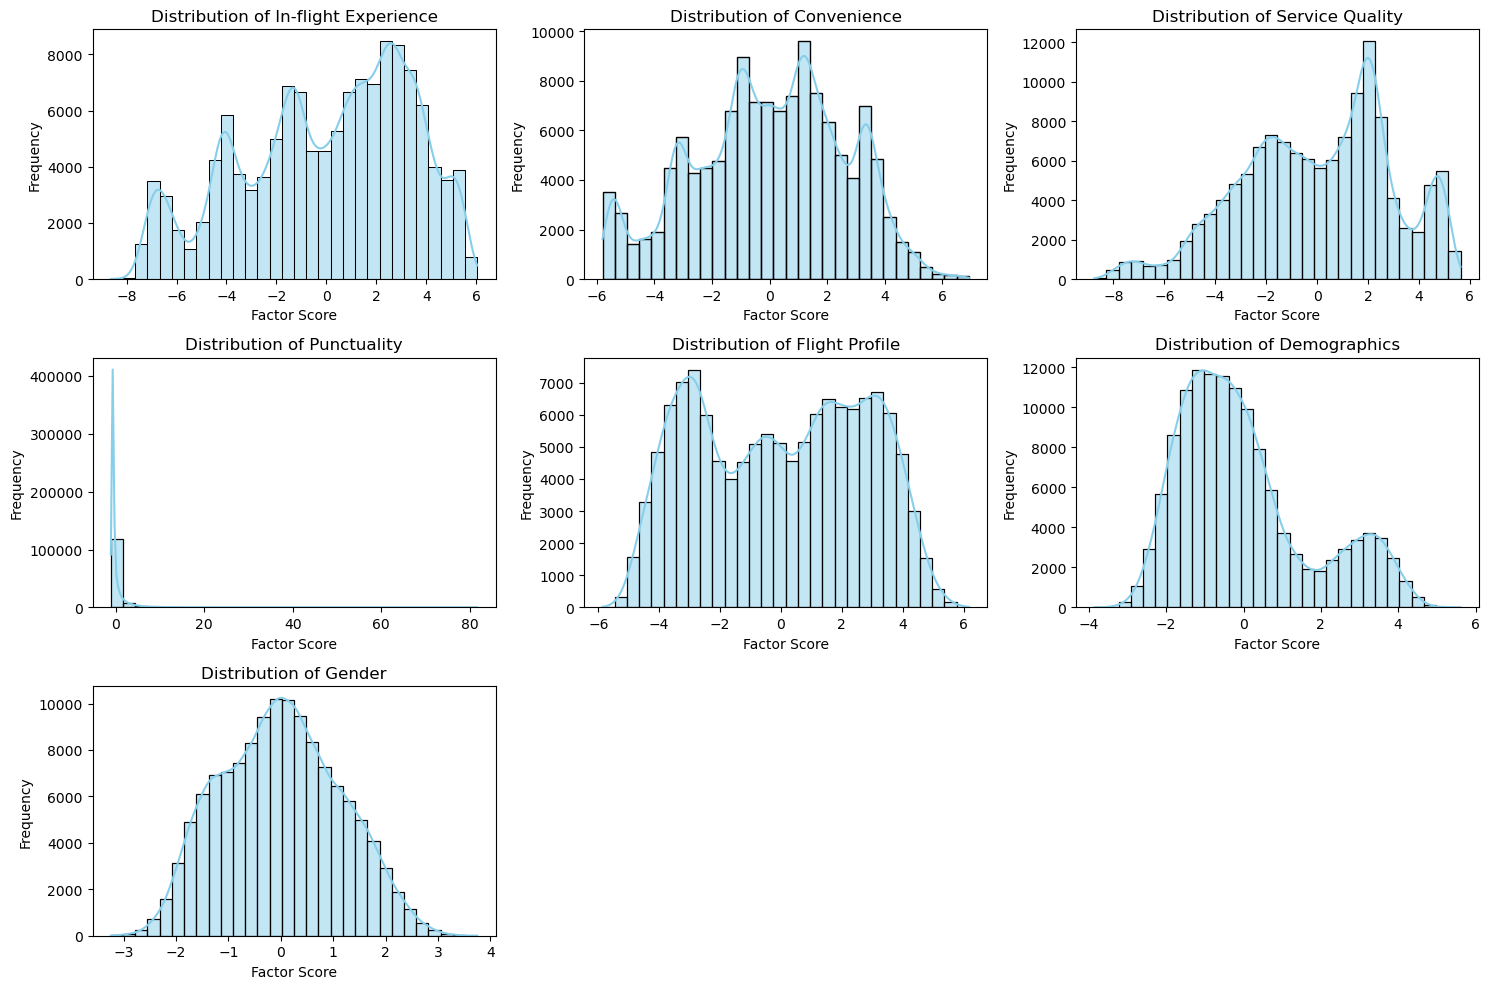

In [46]:
# Vẽ đồ thị phân phối điểm nhân tố
plt.figure(figsize=(15, 10))
for i, column in enumerate(factor_scores_case_1.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(factor_scores_case_1[column], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel('Factor Score')
    plt.ylabel('Frequency')
    plt.tight_layout()
plt.show()